In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/drug.csv')

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2


Confusion Matrix:
 [[1 0 0]
 [0 0 0]
 [0 1 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

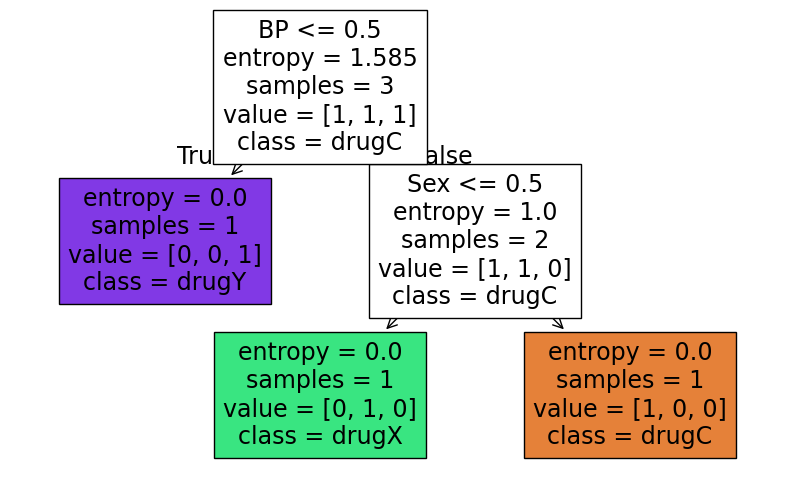

In [ ]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Example data (replace with your CSV file if available)
data = pd.DataFrame({
    'Age': [23, 47, 47, 28, 61],
    'Sex': ['F', 'M', 'M', 'F', 'F'],
    'BP': ['HIGH', 'LOW', 'LOW', 'NORMAL', 'LOW'],
    'Cholesterol': ['HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH'],
    'Na_to_K': [25.355, 13.093, 10.114, 7.798, 18.043],
    'Drug': ['drugY', 'drugC', 'drugC', 'drugX', 'drugY']
})

# Encode categorical columns
le_Sex = LabelEncoder()
le_BP = LabelEncoder()
le_Chol = LabelEncoder()
le_Drug = LabelEncoder()

data['Sex'] = le_Sex.fit_transform(data['Sex'])
data['BP'] = le_BP.fit_transform(data['BP'])
data['Cholesterol'] = le_Chol.fit_transform(data['Cholesterol'])
data['Drug'] = le_Drug.fit_transform(data['Drug'])

# Define features and target
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Accuracy and evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(10,6))
tree.plot_tree(clf, feature_names=X.columns, class_names=le_Drug.classes_, filled=True)
plt.show()
